In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from lime.lime_tabular import LimeTabularExplainer
import time

In [9]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Grad/RealWorld_ATC_Decision_Dataset_Enhanced3.csv', engine = 'python')

In [10]:
df1 = df.copy()

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Flight_ID                       250000 non-null  int64  
 1   Current_Altitude_ft             250000 non-null  int64  
 2   Current_Speed_knots             250000 non-null  int64  
 3   Heading_degrees                 250000 non-null  int64  
 4   Vertical_Speed_ft_per_min       250000 non-null  int64  
 5   Fuel_Remaining_kg               250000 non-null  float64
 6   MST_minutes                     250000 non-null  float64
 7   Wind_Speed_knots                250000 non-null  float64
 8   Wind_Direction_degrees          250000 non-null  int64  
 9   Visibility_meters               250000 non-null  int64  
 10  Precipitation_mm                250000 non-null  float64
 11  Temperature_C                   250000 non-null  float64
 12  Runway_Condition

In [12]:
df1.describe()
# summary.to_csv('describe_summary.csv', index = True)
# files.download('describe_summary.csv')

,Flight_ID,Current_Altitude_ft,Current_Speed_knots,Heading_degrees,Vertical_Speed_ft_per_min,Fuel_Remaining_kg,MST_minutes,Wind_Speed_knots,Wind_Direction_degrees,Visibility_meters,Precipitation_mm,Temperature_C,Aircraft_in_Holding,ATC_Workload,Available_Parking_Spots,Parking_Occupancy_Time_minutes,Taxiing_Rate_knots,Arrival_Time_Diff_minutes,Distance_to_Destination_nm,Delay_Cost
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,125000.500000,1500.988772,149.920692,90.013916,-0.031384,5499.598750,5.510769,32.448677,179.633784,5504.695868,24.962779,10.015548,6.592180,11.998856,19.434432,62.449096,17.519022,25.000952,12.009190,2446.143126
std,72168.927986,865.391469,17.639791,10.009716,578.134351,2035.246262,2.600248,10.251513,104.157433,2605.423065,14.579690,17.331573,5.113669,4.547536,13.975083,33.483656,7.215476,20.491271,4.672679,1398.687495
min,1.000000,0.000000,120.000000,47.000000,-1000.000000,2000.000000,1.000000,8.290000,0.000000,500.000000,0.000000,-20.000000,0.000000,5.000000,0.000000,5.000000,5.000000,-10.000000,4.000000,0.000000
25%,62500.750000,752.000000,135.000000,83.000000,-501.000000,3748.689265,3.250000,23.720000,89.000000,3256.000000,12.430000,-4.990000,3.000000,8.000000,7.000000,33.000000,11.270000,7.000000,8.000000,1180.000000
50%,125000.500000,1504.000000,150.000000,90.000000,0.000000,5493.508323,5.520000,32.460000,179.000000,5511.000000,24.950000,10.040000,6.000000,11.000000,19.000000,62.000000,17.540000,25.000000,12.020000,2330.000000
75%,187500.250000,2249.000000,165.000000,97.000000,501.000000,7247.254937,7.760000,41.230000,270.000000,7761.000000,37.470000,25.050000,9.000000,16.000000,29.000000,91.000000,23.762500,43.000000,16.000000,3670.000000
max,250000.000000,2999.000000,180.000000,137.000000,1000.000000,9494.660955,10.000000,50.000000,360.000000,10000.000000,50.000000,40.000000,20.000000,20.000000,50.000000,120.000000,30.000000,60.000000,20.000000,5000.000000


In [13]:
df1.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [14]:
df1.columns

Index(['Flight_ID', 'Current_Altitude_ft', 'Current_Speed_knots',
       'Heading_degrees', 'Vertical_Speed_ft_per_min', 'Fuel_Remaining_kg',
       'MST_minutes', 'Wind_Speed_knots', 'Wind_Direction_degrees',
       'Visibility_meters', 'Precipitation_mm', 'Temperature_C',
       'Runway_Conditions', 'Runway_Availability', 'Aircraft_in_Holding',
       'ATC_Workload', 'Time_of_Day', 'Available_Parking_Spots',
       'Parking_Occupancy_Time_minutes', 'Taxiing_Rate_knots',
       'Out_of_Gate_Time', 'Arrival_Time_Diff_minutes',
       'Distance_to_Destination_nm', 'Aircraft_Type_Model',
       'Flight_Route_Complexity', 'ATC_Instruction', 'Delay_Cost'],
      dtype='object')

In [15]:
target = df1['ATC_Instruction']
features = df1.drop(columns = {'ATC_Instruction', 'Flight_ID', 'Out_of_Gate_Time'})
target

,ATC_Instruction
0,Divert
1,Hold
2,Divert
3,Divert
4,Divert
...,...
249995,Divert
249996,Hold
249997,Divert
249998,Divert


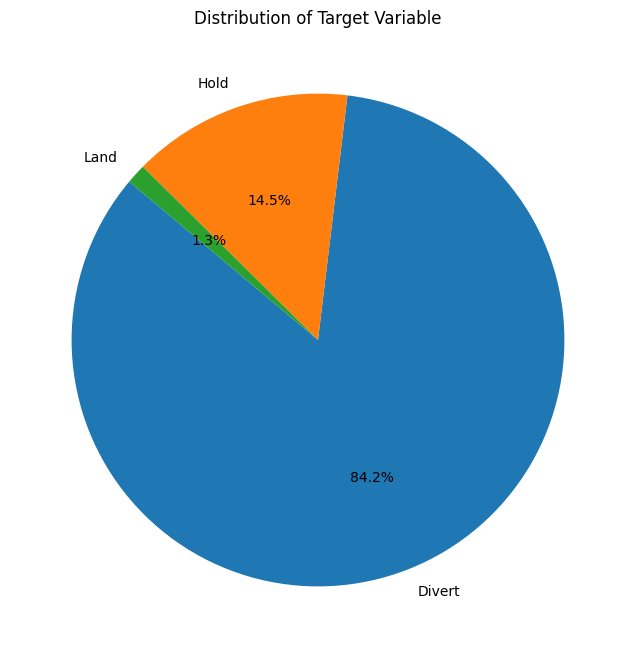

In [16]:
target_counts = target.value_counts()
target_counts

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Target Variable')
plt.show()

In [17]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.3)

In [18]:
num_train = x_train.select_dtypes(include = (float, int))
cat_train = x_train.select_dtypes(include = (object, bool))

num_test = x_test.select_dtypes(include = (float, int))
cat_test = x_test.select_dtypes(include = (object, bool))

In [19]:
num_train.isnull().sum()

,0
Current_Altitude_ft,0
Current_Speed_knots,0
Heading_degrees,0
Vertical_Speed_ft_per_min,0
Fuel_Remaining_kg,0
MST_minutes,0
Wind_Speed_knots,0
Wind_Direction_degrees,0
Visibility_meters,0
Precipitation_mm,0


In [20]:
cat_train.isnull().sum()

,0
Runway_Conditions,0
Runway_Availability,0
Time_of_Day,0
Aircraft_Type_Model,0
Flight_Route_Complexity,0


In [21]:
for column in cat_train.columns:
  unique_values = cat_train[column].unique()
  print(f'column: {column}')
  print(f"Unique Values: {', '.join(map(str, unique_values))}")
  print(f"Unique Values Count: {len(unique_values)}\n")

column: Runway_Conditions
Unique Values: Icy, Dry, Wet
Unique Values Count: 3

column: Runway_Availability
Unique Values: Open, Closed
Unique Values Count: 2

column: Time_of_Day
Unique Values: Off-Peak, Peak
Unique Values Count: 2

column: Aircraft_Type_Model
Unique Values: Airbus A320, Embraer 190, Boeing 737, Boeing 777, Airbus A380
Unique Values Count: 5

column: Flight_Route_Complexity
Unique Values: Direct, Multiple Waypoints
Unique Values Count: 2



In [22]:
#One-Hot encoding train set
ohe_train = pd.get_dummies(cat_train, columns = ['Flight_Route_Complexity', 'Aircraft_Type_Model'])
ohe_train[ohe_train.select_dtypes('bool').columns] = ohe_train.select_dtypes('bool').astype(int)
cat_train_encoded = ohe_train.copy()
cat_train_encoded.drop(columns = ['Flight_Route_Complexity_Multiple Waypoints'], axis = 1, inplace = True)

#One-Hot encoding test set
ohe_test = pd.get_dummies(cat_test, columns = ['Flight_Route_Complexity', 'Aircraft_Type_Model'])
ohe_test[ohe_train.select_dtypes('bool').columns] = ohe_train.select_dtypes('bool').astype(int)
ohe_test = ohe_test.reindex(columns = ohe_train.columns, fill_value = 0)
cat_test_encoded = ohe_test.copy()
cat_test_encoded.drop(columns = ['Flight_Route_Complexity_Multiple Waypoints'], axis = 1, inplace = True)


In [23]:
cat_train_encoded

,Runway_Conditions,Runway_Availability,Time_of_Day,Flight_Route_Complexity_Direct,Aircraft_Type_Model_Airbus A320,Aircraft_Type_Model_Airbus A380,Aircraft_Type_Model_Boeing 737,Aircraft_Type_Model_Boeing 777,Aircraft_Type_Model_Embraer 190
10601,Icy,Open,Off-Peak,1,1,0,0,0,0
175692,Icy,Open,Peak,1,0,0,0,0,1
40484,Dry,Open,Peak,0,0,0,1,0,0
179716,Icy,Open,Off-Peak,1,0,0,1,0,0
63134,Wet,Open,Peak,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
129990,Dry,Open,Peak,1,0,0,1,0,0
241660,Dry,Open,Peak,1,0,0,0,1,0
227774,Wet,Open,Peak,0,0,0,0,1,0
230898,Dry,Closed,Peak,1,0,0,0,1,0


In [24]:
# Binary Encoding
cat_train_encoded['Runway_availability_Encoded'] = cat_train['Runway_Availability'].map({'Closed': 0, 'Open': 1})
cat_test_encoded['Runway_availability_Encoded'] = cat_test['Runway_Availability'].map({'Closed': 0, 'Open': 1})

cat_train_encoded['Time_of_Day_Encoded'] = cat_train['Time_of_Day'].map({'Off-Peak': 0, 'Peak': 1})
cat_test_encoded['Time_of_Day_Encoded'] = cat_test['Time_of_Day'].map({'Off-Peak': 0, 'Peak': 1})

cat_train_encoded.drop(columns = ['Runway_Availability', 'Time_of_Day'], axis = 1, inplace = True)
cat_test_encoded.drop(columns = ['Runway_Availability', 'Time_of_Day'], axis = 1, inplace = True)

cat_train_encoded

,Runway_Conditions,Flight_Route_Complexity_Direct,Aircraft_Type_Model_Airbus A320,Aircraft_Type_Model_Airbus A380,Aircraft_Type_Model_Boeing 737,Aircraft_Type_Model_Boeing 777,Aircraft_Type_Model_Embraer 190,Runway_availability_Encoded,Time_of_Day_Encoded
10601,Icy,1,1,0,0,0,0,1,0
175692,Icy,1,0,0,0,0,1,1,1
40484,Dry,0,0,0,1,0,0,1,1
179716,Icy,1,0,0,1,0,0,1,0
63134,Wet,1,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...
129990,Dry,1,0,0,1,0,0,1,1
241660,Dry,1,0,0,0,1,0,1,1
227774,Wet,0,0,0,0,1,0,1,1
230898,Dry,1,0,0,0,1,0,0,1


In [25]:
lb = LabelEncoder()

cat_train_encoded['Runway_Conditions_Encoded'] = lb.fit_transform(cat_train_encoded['Runway_Conditions'])
cat_test_encoded['Runway_Conditions_Encoded'] = lb.transform(cat_test_encoded['Runway_Conditions'])

cat_train_encoded.drop('Runway_Conditions', axis = 1, inplace = True)
cat_test_encoded.drop('Runway_Conditions', axis = 1, inplace = True)

y_train = pd.DataFrame(lb.fit_transform(y_train))
y_test= pd.DataFrame(lb.transform(y_test))

In [26]:
cat_train_encoded

,Flight_Route_Complexity_Direct,Aircraft_Type_Model_Airbus A320,Aircraft_Type_Model_Airbus A380,Aircraft_Type_Model_Boeing 737,Aircraft_Type_Model_Boeing 777,Aircraft_Type_Model_Embraer 190,Runway_availability_Encoded,Time_of_Day_Encoded,Runway_Conditions_Encoded
10601,1,1,0,0,0,0,1,0,1
175692,1,0,0,0,0,1,1,1,1
40484,0,0,0,1,0,0,1,1,0
179716,1,0,0,1,0,0,1,0,1
63134,1,0,0,0,1,0,1,1,2
...,...,...,...,...,...,...,...,...,...
129990,1,0,0,1,0,0,1,1,0
241660,1,0,0,0,1,0,1,1,0
227774,0,0,0,0,1,0,1,1,2
230898,1,0,0,0,1,0,0,1,0


In [27]:
cat_test_encoded.isnull().sum()

,0
Flight_Route_Complexity_Direct,0
Aircraft_Type_Model_Airbus A320,0
Aircraft_Type_Model_Airbus A380,0
Aircraft_Type_Model_Boeing 737,0
Aircraft_Type_Model_Boeing 777,0
Aircraft_Type_Model_Embraer 190,0
Runway_availability_Encoded,0
Time_of_Day_Encoded,0
Runway_Conditions_Encoded,0


In [28]:
x_train_processed = pd.concat([num_train, cat_train_encoded], axis= 1)
x_test_processed = pd.concat([num_test, cat_test_encoded], axis= 1)

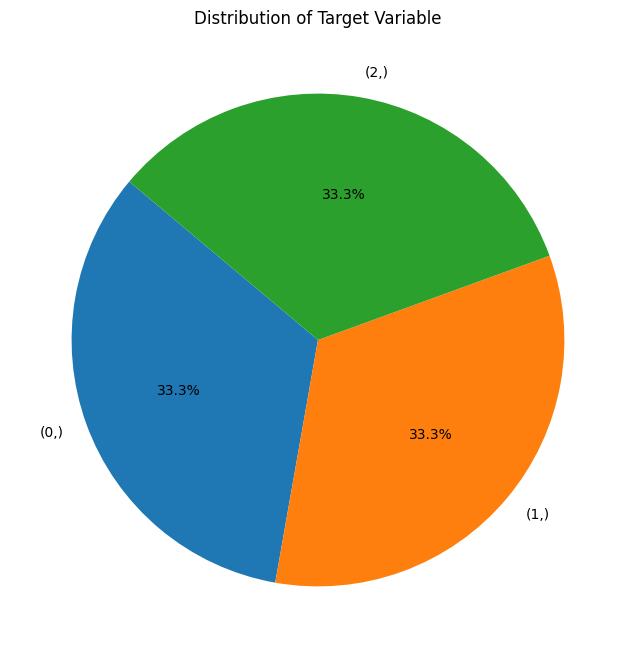

In [29]:
smote = SMOTE()

x_train_resampled, y_train_resampled = smote.fit_resample(x_train_processed, y_train)

target_counts = y_train_resampled.value_counts()
target_counts

plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Target Variable')
plt.show()

In [30]:
#Standardization of numerical features
scaler = StandardScaler()
x_train_resampled[num_train.columns] = scaler.fit_transform(x_train_resampled[num_train.columns])
x_test_processed[num_test.columns] = scaler.transform(x_test_processed[num_train.columns])

x_train_resampled = pd.DataFrame(x_train_resampled, columns = x_train_resampled.columns)
x_test_processed = pd.DataFrame(x_test_processed, columns = x_test_processed.columns)

In [31]:
# x_train_sample = x_train_resampled.iloc[:int(len(x_train_resampled) * 0.5)]
# y_train_sample = y_train_resampled.iloc[:int(len(y_train_resampled) * 0.5)]

# print(x_train_sample.shape, y_train_sample.shape)
# x_train_sample

In [32]:
knn = KNeighborsClassifier()

knn.fit(x_train_resampled, y_train_resampled)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [33]:
start_time = time.time()
y_pred = knn.predict(x_test_processed)
end_time = time.time()
total_time = end_time - start_time

accuracy = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test, average = 'macro')
recall = recall_score(y_pred, y_test, average = 'macro')
f1score = f1_score(y_pred, y_test, average = 'macro')

print(accuracy, precision, recall, f1score)
print(total_time)

0.9442666666666667 0.9147067114722063 0.7311025954207285 0.7941939649246225
229.41455173492432


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


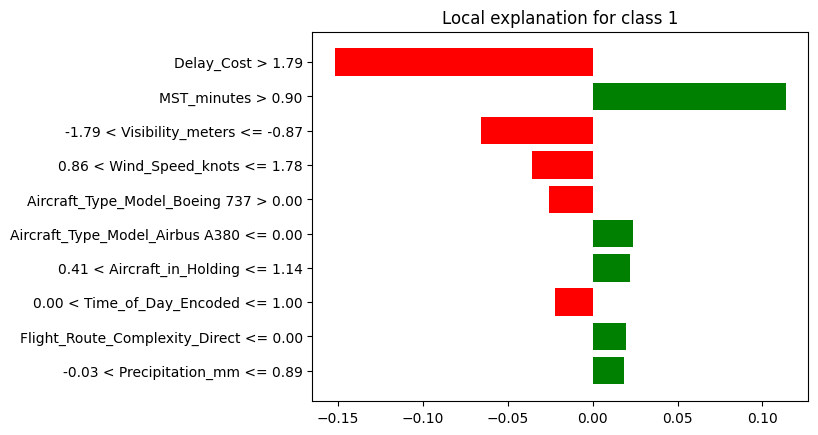

In [35]:
sample_data_point = x_test_processed.iloc[2, :]

# Create the explainer
explainer = LimeTabularExplainer(
    x_test_processed.values,
    feature_names = x_test_processed.columns,
    mode = 'classification'
)

# Generate the explanation
exp = explainer.explain_instance(sample_data_point.values, knn.predict_proba)

# Display the explanation
exp.as_pyplot_figure()
plt.show()

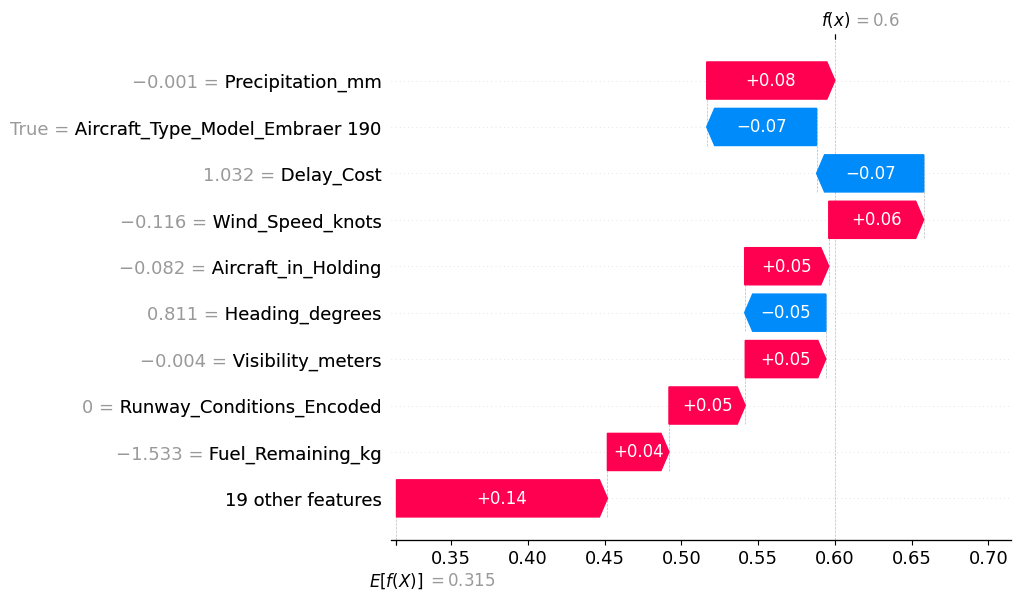

In [38]:
import shap

# Create the SHAP explainer
explainer = shap.KernelExplainer(knn.predict_proba, shap.kmeans(x_test_processed, 10))

# Compute SHAP values for the first instance in the test dataset
shap_values = explainer.shap_values(x_test_processed.iloc[0,:])

# Plot the SHAP values using a waterfall plot
shap.waterfall_plot(shap.Explanation(values=shap_values[:, 1],
                    base_values=explainer.expected_value[1],
                    data=x_test_processed.iloc[0, :],
                    feature_names=x_test_processed.columns))

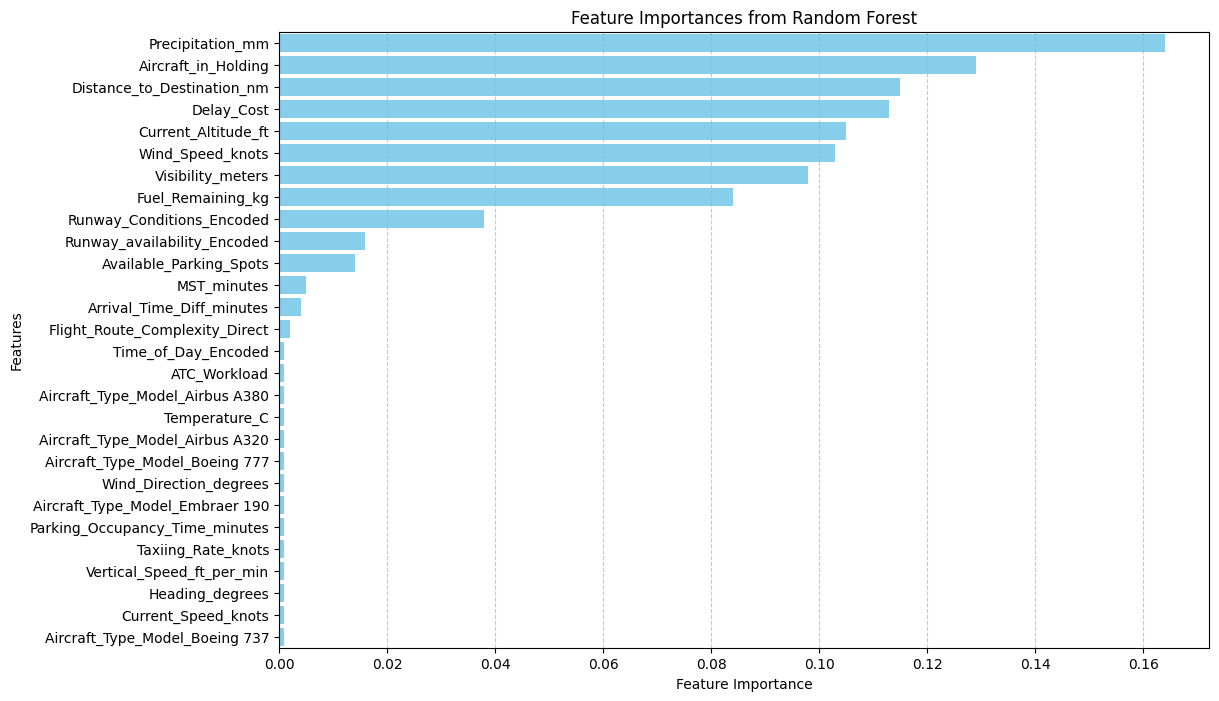

In [ ]:
# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    "Feature": x_train_resampled.columns,
    "Importance": rf1.feature_importances_.round(3)
})

# Sort features by importance
feature_importances = feature_importances.sort_values(by="Importance", ascending=True)

# Set figure size
plt.figure(figsize=(12, 8))

# Create horizontal bar plot
plt.barh(feature_importances["Feature"], feature_importances["Importance"], color="skyblue")

# Set labels and title
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances from Random Forest")

# Adjust y-ticks to add more space between labels
plt.yticks(np.arange(len(feature_importances)), feature_importances["Feature"], fontsize=10)

# Increase spacing by setting limits with padding
plt.ylim(-0.5, len(feature_importances) - 0.5)

# Add grid for better visualization
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


In [ ]:
rf1 = RandomForestClassifier(n_estimators = 100)

rf1.fit(x_train_resampled, y_train_resampled)

y_pred = rf1.predict(x_test_processed)

accuracy = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test, average = 'macro')
recall = recall_score(y_pred, y_test, average = 'macro')
f1score = f1_score(y_pred, y_test, average = 'macro')

print(accuracy, precision, recall, f1score)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.99976 0.9934924078091106 0.9994478188845942 0.9964378098189942


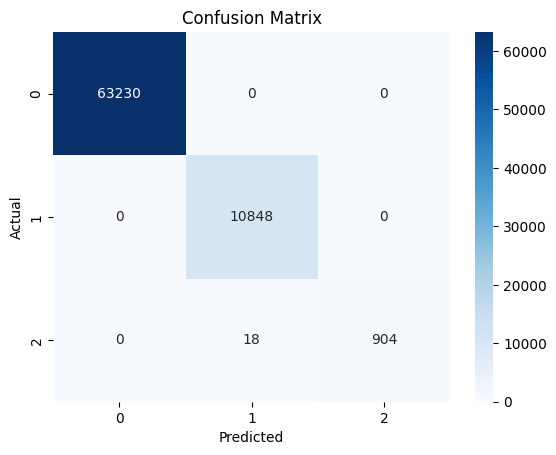

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# y_pred = model.predict(x_test_processed)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
lr = LogisticRegression()

lr.fit(x_train_resampled, y_train_resampled)

y_pred = lr.predict(x_test_processed)

accuracy = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test, average = 'macro')
recall = recall_score(y_pred, y_test, average = 'macro')
f1score = f1_score(y_pred, y_test, average = 'macro')

print(accuracy, precision, recall, f1score)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9892666666666666 0.9400976808753323 0.8453404644794701 0.8797616746154633


In [ ]:
xgboost = XGBClassifier()

xgboost.fit(x_train_resampled, y_train_resampled)

y_pred = xgboost.predict(x_test_processed)

accuracy = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test, average = 'macro')
recall = recall_score(y_pred, y_test, average = 'macro')
f1score = f1_score(y_pred, y_test, average = 'macro')

print(accuracy, precision, recall, f1score)

0.9998666666666667 0.9977078920818964 0.9983918289719459 0.9980494689611441


In [ ]:
adaboost = AdaBoostClassifier()

adaboost.fit(x_train_resampled, y_train_resampled)

y_pred = adaboost.predict(x_test_processed)

accuracy = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test, average = 'macro')
recall = recall_score(y_pred, y_test, average = 'macro')
f1score = f1_score(y_pred, y_test, average = 'macro')

print(accuracy, precision, recall, f1score)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9947466666666667 0.9157782492004719 0.941341210596462 0.9277183795688054


In [ ]:
dt = DecisionTreeClassifier()

dt.fit(x_train_resampled, y_train_resampled)

y_pred = dt.predict(x_test_processed)

accuracy = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test, average = 'macro')
recall = recall_score(y_pred, y_test, average = 'macro')
f1score = f1_score(y_pred, y_test, average = 'macro')

print(accuracy, precision, recall, f1score)

0.99904 0.9739696312364425 0.9978021978021978 0.9853534461088947


In [ ]:
print(dict(zip(x_train_resampled.columns, rf1.feature_importances_)))

{'Current_Altitude_ft': 0.10536896347585131, 'Current_Speed_knots': 0.0005879024652496089, 'Heading_degrees': 0.0005879700850446436, 'Vertical_Speed_ft_per_min': 0.0008305582203844259, 'Fuel_Remaining_kg': 0.08396879308013064, 'MST_minutes': 0.004666416523045129, 'Wind_Speed_knots': 0.10295671263316283, 'Wind_Direction_degrees': 0.0006669529805257092, 'Visibility_meters': 0.09802214233921074, 'Precipitation_mm': 0.16384185256615288, 'Temperature_C': 0.0006444063619678537, 'Aircraft_in_Holding': 0.12915831465562777, 'ATC_Workload': 0.0007564584722760017, 'Available_Parking_Spots': 0.013682653230239606, 'Parking_Occupancy_Time_minutes': 0.0005967376273704401, 'Taxiing_Rate_knots': 0.0006614621006732518, 'Arrival_Time_Diff_minutes': 0.004069086762182515, 'Distance_to_Destination_nm': 0.11464452587035698, 'Delay_Cost': 0.11328171964064843, 'Flight_Route_Complexity_Direct': 0.001931455010051038, 'Aircraft_Type_Model_Airbus A320': 0.0006777962279276722, 'Aircraft_Type_Model_Airbus A380': 0.0

In [ ]:
y_test.shape

In [ ]:
y_pred = pd.DataFrame(y_pred)
y_pred.value_counts()